[pandas-ai git](https://github.com/gventuri/pandas-ai)


```pip install pandasai```


[platform openai link](https://platform.openai.com/)

In [65]:
import pandas as pd

# библиотеки pandasAI
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

# библиотеки для графиков
import matplotlib.pyplot as plt
import seaborn as sns


In [36]:
# НЕ ЗАБУДЬТЕ ПОЛУЧИТЬ API и добавить в строку ниже
llm = OpenAI(api_token="<ВАШ КОД>")
pandas_ai = PandasAI(llm, conversational=False)

In [95]:
# Sample DataFrame
df = pd.DataFrame({
    "страна": ["Фрутландия", "Банановый остров", "Медвежий утес", "Бабуа Новая Тымдляндия", "Длинный Нос", "Край Земли", "Вишневый вкус", "Забытый мир", "Полусонный бизон", "Веселая панда"],
    "валовый внутренний продукт": [300, 250, 200, 100, 400, 300, 240, 120, 188, 178],
    "уровень удовлетворенности": [4.44, 6.36, 2.67, 3.07, 8.23, 4.56, 3.56, 10., 5.12, 5.12]
})
df.head()

,страна,валовый внутренний продукт,уровень удовлетворенности
0,Фрутландия,300,4.44
1,Банановый остров,250,6.36
2,Медвежий утес,200,2.67
3,Бабуа Новая Тымдляндия,100,3.07
4,Длинный Нос,400,8.23


In [96]:
happiest_countries = df.nlargest(5, 'уровень удовлетворенности')['страна'].tolist()
print(f"Топ 5 счастливейших стран:\n\n {chr(10).join(happiest_countries)}")

Топ 5 счастливейших стран:

 Забытый мир
Длинный Нос
Банановый остров
Полусонный бизон
Веселая панда


In [97]:
pandas_ai.run(df, prompt='Топ 5 самых счасливых стран?')

7         Забытый мир
4         Длинный Нос
1    Банановый остров
8    Полусонный бизон
9       Веселая панда
Name: страна, dtype: object

In [98]:
pandas_ai.run(df, prompt='Топ 5 самых счасливых стран и Отсортируй по возрастанию уровня удовлетворенности и выведи все колонки?')

,страна,валовый внутренний продукт,уровень удовлетворенности
2,Медвежий утес,200,2.67
3,Бабуа Новая Тымдляндия,100,3.07
6,Вишневый вкус,240,3.56
0,Фрутландия,300,4.44
5,Край Земли,300,4.56


In [99]:
unhappiest_vvp = df.nsmallest(2, 'уровень удовлетворенности')['валовый внутренний продукт'].sum()
print(f"Сумма ВВП двух самых несчастных государств: {unhappiest_vvp:,}")

Сумма ВВП двух самых несчастных государств: 300


In [100]:
pandas_ai.run(df, prompt='Посчитай сумму Валового продукта у двух самых неудовлетворенных стран')

300

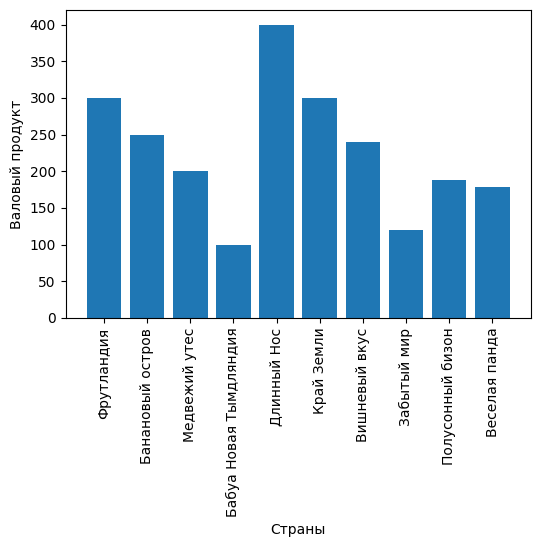

In [102]:
pandas_ai.run(
    df,
    """
    Построй график гистограммы валовый продукт по странам.
    Ось ординат это валовый продукт. 
    Ось абсцисс - страны.
    Ширина графика 600 пискелей.
    """,
    show_code=True
)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(df['страна'], df['валовый внутренний продукт'])
plt.xticks(rotation=90)
plt.ylabel('Валовый продукт')
plt.xlabel('Страны')
plt.show()

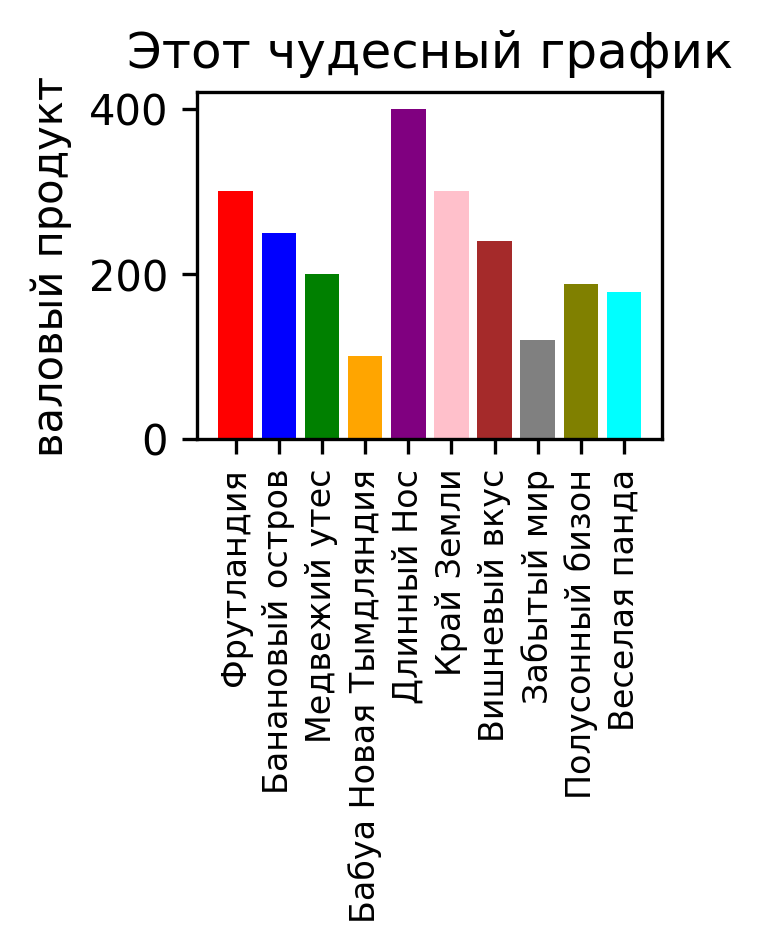

In [103]:
pandas_ai.run(
    df,
    """Построй график гистограммы по валовому продукту для каждой страны.
    Ось ординат это валовый продукт. 
    Разверни лэйблы на оси абсцисс на 90 градусов. 
    Используй уникальный цвет для каждой полоски.
    Добавь название для графика - Этот чудесный график.
    Размер лэйблов 8 пикселей.
    Разрешение графика 300 точек на дюйм.
    Размер графика 200 на 150 пикселей
    """
    ,   show_code=True
)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(2, 1.5), dpi=300)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan']
for i, row in df.iterrows():
    ax.bar(row['страна'], row['валовый внутренний продукт'], color=colors[i])
plt.xticks(rotation=90, fontsize=8)
ax.set_ylabel('валовый продукт')
ax.set_title('Этот чудесный график')
plt.show()